In [1]:
%reset

In [2]:
from datamaker_f import VideoDataGenerator, VideoDataGenerator2
from pipeline_f import build_full_model
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from io import BytesIO
from PIL import Image
import pandas as pd
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Set the pickle directory path
pickle_dir = 'D:/Projects/Face-Swap-Detection-Model/DF'

# Create the generators
train_generator = VideoDataGenerator2(pickle_dir=pickle_dir, batch_size=16)


In [ ]:
# Fetch a single batch from the train generator
batch_data = next(iter(train_generator))

# Unpack the data
(X_frames, X_micro_exp), y = batch_data

# Print the shape of the data
print("Shape of X_frames:", X_frames.shape)
print("Shape of X_micro_exp:", X_micro_exp.shape)
print("Shape of y:", y.shape)


Shape of X_frames: (16, 224, 224, 3)
Shape of X_micro_exp: (16, 64, 64, 3)
Shape of y: (16, 1)


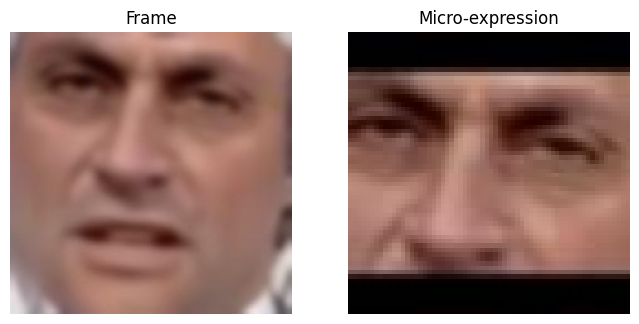

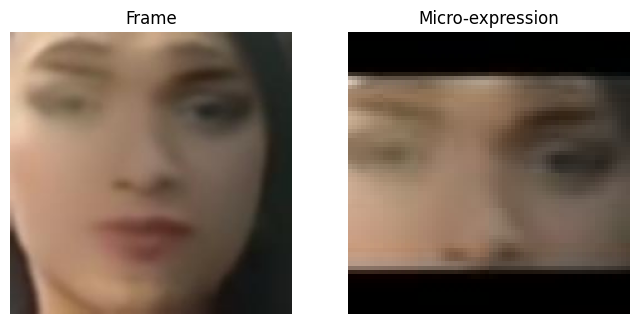

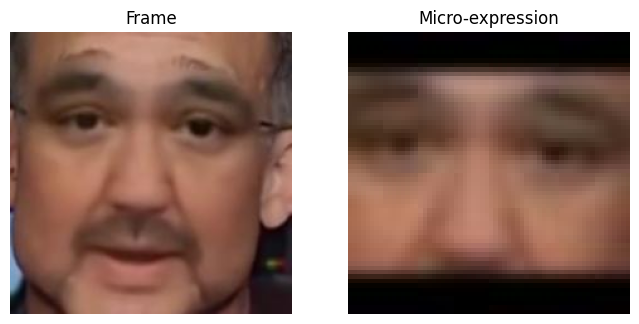

In [ ]:
import matplotlib.pyplot as plt

# Visualize a few frames and micro-expressions
num_samples = 3  # Number of samples to visualize

for i in range(num_samples):
    plt.figure(figsize=(8, 4))
    
    # Plot the frame
    plt.subplot(1, 2, 1)
    plt.imshow(X_frames[i].astype('uint8'))  # Convert to uint8 for correct display
    plt.title("Frame")
    plt.axis('off')
    
    # Plot the micro-expression
    plt.subplot(1, 2, 2)
    plt.imshow(X_micro_exp[i].astype('uint8'))
    plt.title("Micro-expression")
    plt.axis('off')
    
    plt.show()


In [ ]:
print("Number of batches in train generator:", len(train_generator))


Number of batches in train generator: 340


In [ ]:
# Iterate over the generator
for i, (batch_data) in enumerate(train_generator):
    if i >= 3:  # Limit to the first 3 batches
        break
    print(f"Batch {i+1}:")
    # Unpack the data
    (X_frames, X_micro_exp), y = batch_data
    print("Shape of X_frames:", X_frames.shape)
    print("Shape of X_micro_exp:", X_micro_exp.shape)
    print("Shape of y:", y.shape)


Batch 1:
Shape of X_frames: (16, 224, 224, 3)
Shape of X_micro_exp: (16, 64, 64, 3)
Shape of y: (16, 1)
Batch 2:
Shape of X_frames: (16, 224, 224, 3)
Shape of X_micro_exp: (16, 64, 64, 3)
Shape of y: (16, 1)
Batch 3:
Shape of X_frames: (16, 224, 224, 3)
Shape of X_micro_exp: (16, 64, 64, 3)
Shape of y: (16, 1)
